#  Classification problem using Portuguese Bank Marketing Data Set


##  Imports

In [93]:
# These imports will be useful for this problem of classification

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

## Pre-Proecessing

In [94]:
path = "bank-full.csv" 
df = pd.read_csv(path,sep=";") # reading the csv file and removing ';'

In [95]:
df.head() # first 5 rows of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [96]:
df.info() # Displaying all the columns with their data types and null values status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [97]:
df['y'].value_counts() # counting the 'yes' and 'no' for the label

no     39922
yes     5289
Name: y, dtype: int64

In [98]:
df.shape # rows and columns

(45211, 17)

In [99]:

df.isnull().sum() # show total number of null values for each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [100]:
df['y'].unique() # unique values present in label of the dataset

array(['no', 'yes'], dtype=object)

In [101]:
df.duplicated().sum() # check for duplication

0

In [102]:
df.describe()  # statistical summary of the nummerical features

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [103]:
df['y'] = df['y'].replace(to_replace = ['yes','no'],value = [1,0]) # changing target values from 'yes' and 'no' to 1 and 0

## Analysis

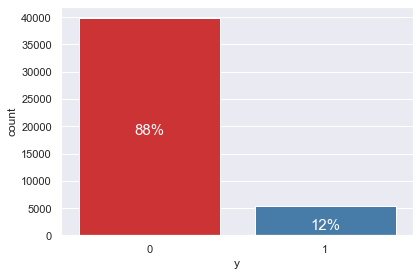

In [104]:
# Using seaborn to make statistical graphs

sns.set(font_scale=1)
perc_age = df['y'].agg('value_counts', normalize=True) * 100  # creating percentage distribution
countplt=sns.countplot(x='y', data=df, palette ='Set1') # creating graph
plt.text(0, 18000, "{:.2g}%".format(perc_age[0]),  ha='center', va='bottom', size=15, color='w') # applying percentage distribution to '0'
plt.text(1, 500, "{:.2g}%".format(perc_age[1]),  ha='center', va='bottom', size=15, color='w') # applying percentage distribution to '1' 
plt.tight_layout()
plt.show() # display graph

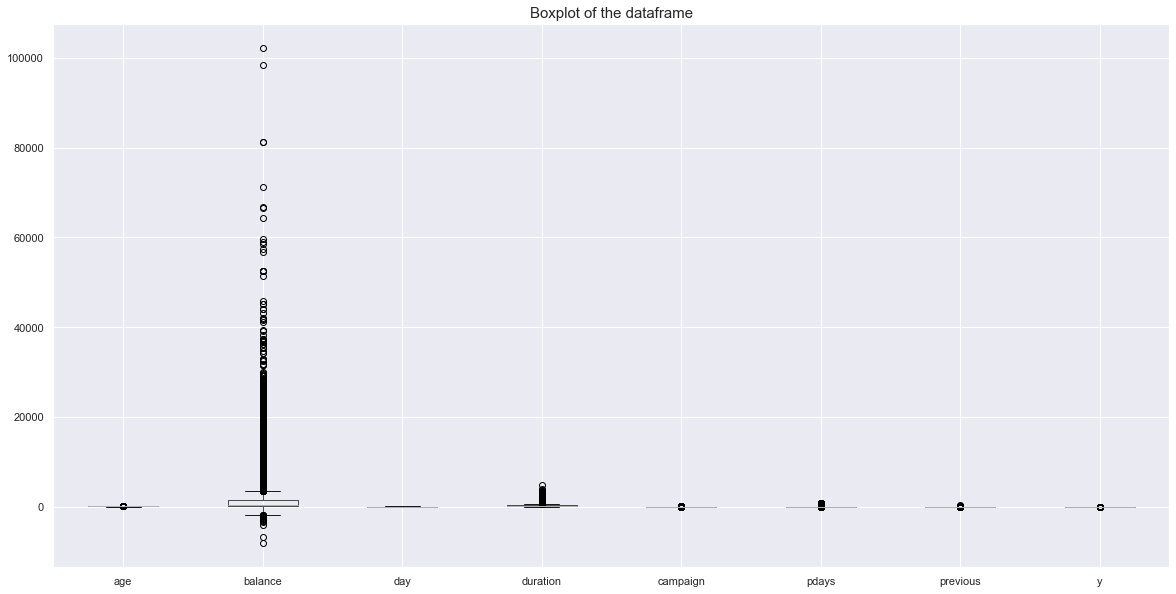

In [105]:
# creating boxplot for df

plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

#### Creating correlation heat map

In [106]:
df['normal_balance']=zscore(df['balance']) # adding new column with zscore values of 'balance'

In [107]:
df=df.drop(df[(df['normal_balance']>3)|(df['normal_balance']<-3)].index, axis=0, inplace=False) # step to remove outliers

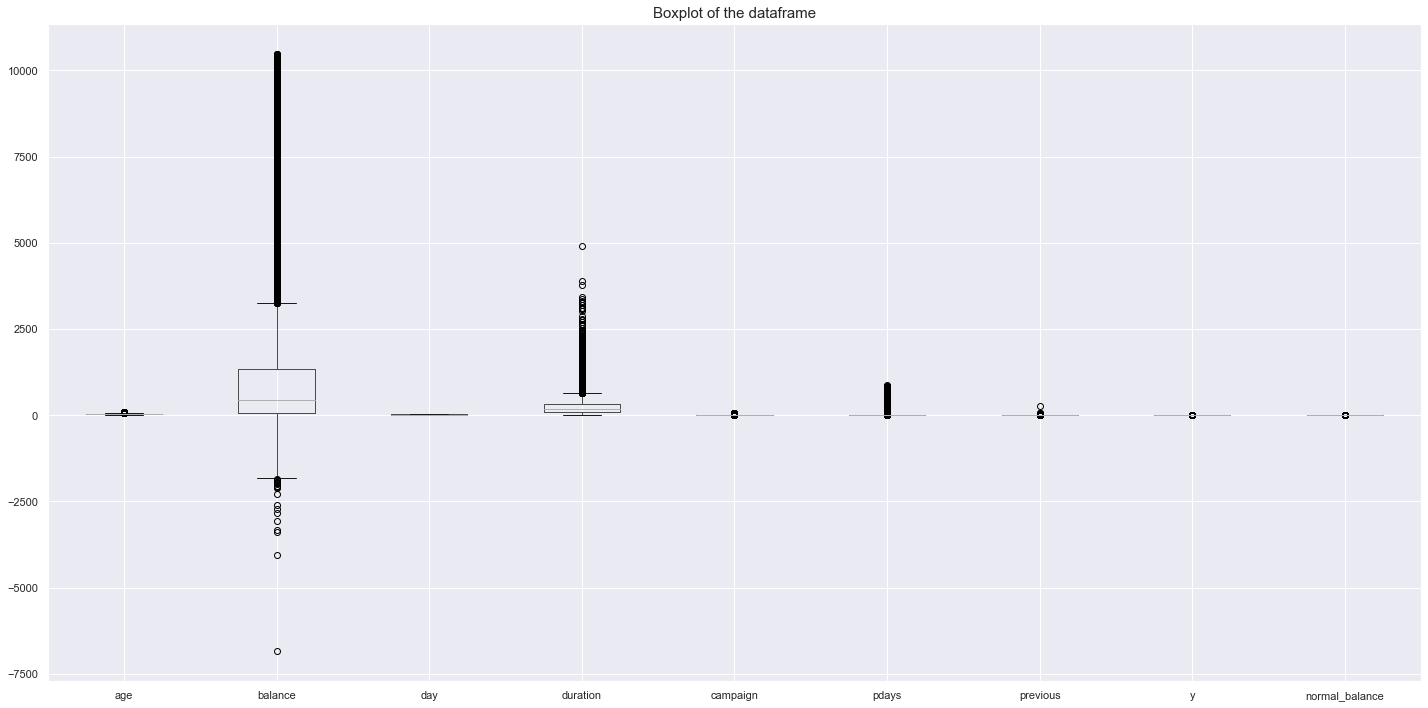

In [108]:
# showing boxplot with removed outliers

plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
plt.tight_layout()
print()

<AxesSubplot:xlabel='age', ylabel='balance'>

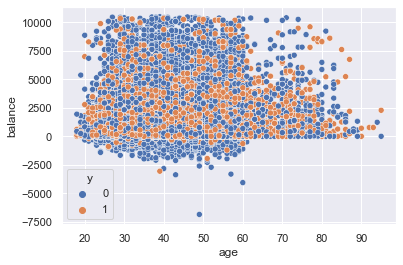

In [109]:
# Scatter plot with age and balance on x and y-axis respectively 

sns.scatterplot(x='age',y='balance',data=df, hue='y')

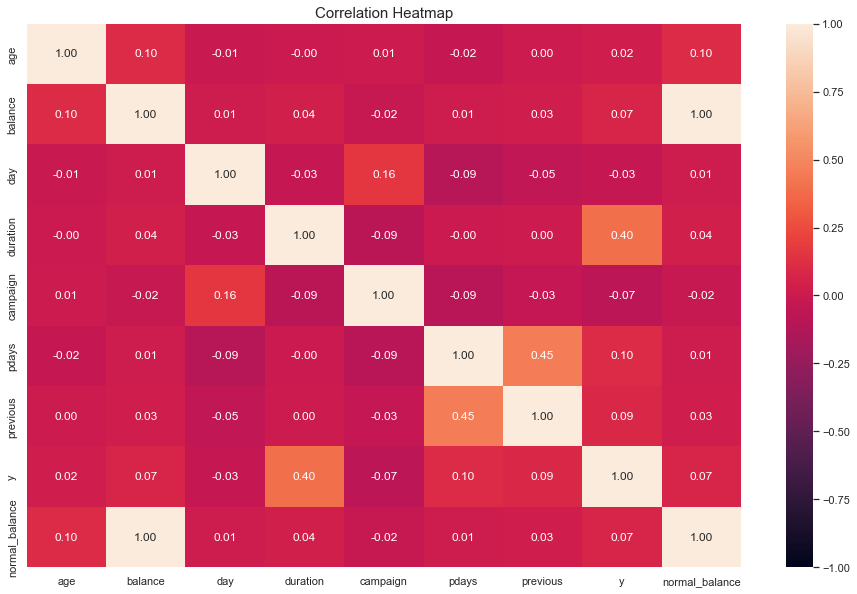

In [110]:
# correlation matrix for df

corr_matrix = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

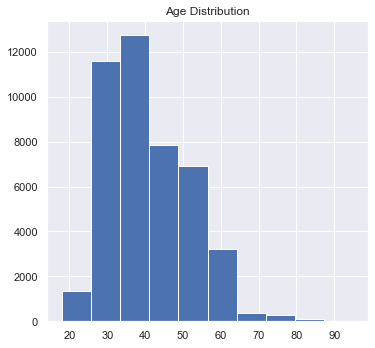

In [111]:
# Histogram chart showing age distribution for df

age_dist = plt.figure(figsize = (10,5))

chart = age_dist.add_subplot(1,2,1)

chart.hist(df['age'])

chart.set_title('Age Distribution')

plt.tight_layout()
plt.show()

In [113]:
df2 = df.copy() # creating a copy of df called df2

In [114]:
del df2["normal_balance"] # removing the normal_balance column from df2

In [115]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


## Data preparation for models application

In [116]:
# converting non-numerical values to numerical

data = pd.get_dummies(df2, columns=[ "job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"], drop_first=True)
data

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [117]:
# moving target column to the end

column_to_move = data.pop('y')
data.insert(42, "y", column_to_move)

In [118]:
# seperating feature columns and target column

X = data.drop('y',axis='columns')
y = data['y']

In [119]:
# fixing the imbalanced data using Synthetic Minority Oversampling technique (SMOTE)

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X,y)

In [120]:
# creating train test split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size= 0.30, stratify=y_smote)

In [121]:
# feature scaling

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train_scale= st_x.fit_transform(X_train)    
X_test_scale= st_x.transform(X_test)  

## KNN

In [122]:
# finding ideal number of neighbors for KNN

import math
math.sqrt(len(y_test))

153.5545505675426

In [123]:
clf_knn = KNeighborsClassifier(n_neighbors=153) # creating instance of KNN

In [124]:
clf_knn.fit(X_train_scale, y_train) # model fitting KNN
pred_knn = clf_knn.predict(X_test_scale) # prediction of test set results

[[10917   873]
 [ 1271 10518]]


<AxesSubplot:>

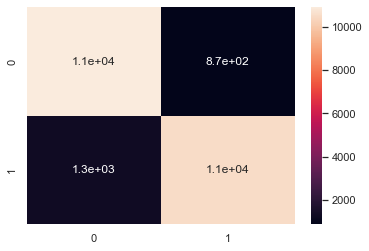

In [125]:
# creating confusion matrx for KNN

cm_knn = confusion_matrix(y_test, pred_knn)
print(cm_knn)
sns.heatmap(cm_knn, annot=True)

In [126]:
# classification report,f1 score, accuracy score KNN

print(classification_report(y_test,pred_knn))
print(f1_score(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11790
           1       0.92      0.89      0.91     11789

    accuracy                           0.91     23579
   macro avg       0.91      0.91      0.91     23579
weighted avg       0.91      0.91      0.91     23579

0.9075064710957722
0.9090716315365367


In [138]:
grid_knn = KNeighborsClassifier() # new instance of KNN for grid search

In [139]:
# grid search execution KNN

param_grid = [{
    
    "n_neighbors":[100,110,115,120,130,140,180], "weights": ["uniform", "distance"]
    
}]

grid_search = GridSearchCV(grid_knn, param_grid, cv=3, scoring="accuracy", return_train_score=True, verbose=10)

grid_search.fit(X_train_scale, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3; 1/14] START n_neighbors=100, weights=uniform...........................
[CV 1/3; 1/14] END n_neighbors=100, weights=uniform;, score=(train=0.907, test=0.908) total time=   2.6s
[CV 2/3; 1/14] START n_neighbors=100, weights=uniform...........................
[CV 2/3; 1/14] END n_neighbors=100, weights=uniform;, score=(train=0.907, test=0.906) total time=   1.9s
[CV 3/3; 1/14] START n_neighbors=100, weights=uniform...........................
[CV 3/3; 1/14] END n_neighbors=100, weights=uniform;, score=(train=0.909, test=0.906) total time=   2.5s
[CV 1/3; 2/14] START n_neighbors=100, weights=distance..........................
[CV 1/3; 2/14] END n_neighbors=100, weights=distance;, score=(train=1.000, test=0.914) total time=   1.5s
[CV 2/3; 2/14] START n_neighbors=100, weights=distance..........................
[CV 2/3; 2/14] END n_neighbors=100, weights=distance;, score=(train=1.000, test=0.913) total time=   2.4s
[CV 3/3

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [100, 110, 115, 120, 130, 140, 180],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [140]:
# grid search score KNN

clf_est = grid_search.best_estimator_
clf_est.score(X_test_scale, y_test)

0.9201832138767547

## Logistic Regression

In [127]:
clf_log = LogisticRegression().fit(X_train_scale, y_train) # creating instance and model fitting LogisticRegression
pred_log = clf_log.predict(X_test_scale) # prediction of test set LogisticRegression

[[11099   691]
 [  965 10824]]


<AxesSubplot:>

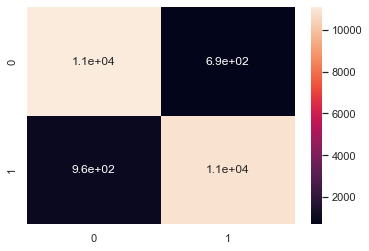

In [128]:
# creating confusion matrix for LogisticRegression

cm_log = confusion_matrix(y_test,pred_log)
print(cm_log)
sns.heatmap(cm_log, annot=True)

In [129]:
# classification report,f1 score, accuracy score LogisticRegression

print(classification_report(y_test,pred_log))
print(f1_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11790
           1       0.94      0.92      0.93     11789

    accuracy                           0.93     23579
   macro avg       0.93      0.93      0.93     23579
weighted avg       0.93      0.93      0.93     23579

0.9289392378990731
0.9297680139106832


In [130]:
# Hyperparameter tuning LogisticRegression

hyp_log = LogisticRegression(solver='newton-cg',multi_class='multinomial',
                           penalty='none',C=1.0, fit_intercept = True).fit(X_train_scale, y_train)

In [131]:
hyp_pred_log = hyp_log.predict(X_test_scale)

In [132]:
# classification report,f1 score, accuracy score LogisticRegression (hyperparameter tuning)

print(classification_report(y_test,hyp_pred_log))
print(f1_score(y_test,hyp_pred_log))
print(accuracy_score(y_test,hyp_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11790
           1       0.94      0.92      0.93     11789

    accuracy                           0.93     23579
   macro avg       0.93      0.93      0.93     23579
weighted avg       0.93      0.93      0.93     23579

0.9289851963098047
0.9298104245303024


## Random Forest Classifier

In [133]:
clf_rfc = RandomForestClassifier().fit(X_train_scale, y_train) # creating instance and model fitting RFC
pred_rfc = clf_rfc.predict(X_test_scale) # prediction of test set RFC

[[11205   585]
 [  662 11127]]


<AxesSubplot:>

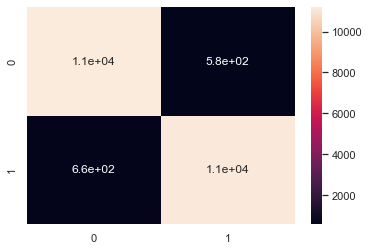

In [134]:
# creating confusion matrix for RFC

cm_rfc = confusion_matrix(y_test, pred_rfc)
print(cm_rfc)
sns.heatmap(cm_rfc, annot=True)

In [135]:
# classification report, f1 score, accuracy score RFC

print(classification_report(y_test,pred_rfc))
print(f1_score(y_test,pred_rfc))
print(accuracy_score(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11790
           1       0.95      0.94      0.95     11789

    accuracy                           0.95     23579
   macro avg       0.95      0.95      0.95     23579
weighted avg       0.95      0.95      0.95     23579

0.9469384281519936
0.9471139573349167


In [136]:
# Hyperparameter tuning RFC

hyp_clf_rfc = RandomForestClassifier(criterion="gini",bootstrap=False).fit(X_train_scale,y_train)
hyp_pred_rfc = hyp_clf_rfc.predict(X_test_scale)

In [137]:
# classification report, f1 score, accuracy score RFC

print(classification_report(y_test,pred_rfc))
print(f1_score(y_test,pred_rfc))
print(accuracy_score(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11790
           1       0.95      0.94      0.95     11789

    accuracy                           0.95     23579
   macro avg       0.95      0.95      0.95     23579
weighted avg       0.95      0.95      0.95     23579

0.9469384281519936
0.9471139573349167
